## Exploratory Data Analysis (EDA)

<b> Import libraries </b>

In [157]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

# Another useful plotting library is plotly - it is used for interactive plots

# progress bar
from tqdm.notebook import tqdm

<br></br>
<b>Load and Check the missing data </b>

In [158]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-', ''] 
# last year's promotion campaign: who accepted or rejected personal offer made to them. 
loan_df = pd.read_csv("personal-loan.csv", na_values=missing_values)
# Display a few rows
loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


* Rows explanation <br>
1 customer_id  Customer identifier <br>
2 age Customer age in years <br>
3 yrs_experience Years of working experience of the customer <br>
4 family_size Number of family members of the customer <br>
5 education Education level of customer <br>
6 income Income level of customer (thousand dollars per year) <br>
7 mortgage Mortage amount tahen by customer <br>
8 credit_card_acct Does the customer have a credit account with the bank? <br>
9 credit_card_spend Monthly credit card spending by customer in thousands of dollars <br>
10 share_trading_acct Does the customer have a share trading account (for buying and selling shares) with the bank? [0=No, 1=Yes] <br>
11 fixed_deposit_acct Does the customer have a fixed term deposit account with the bank?  [0=No, 1=Yes] <br>
12 online_acct Does the customer have an online banking account? <br>
13 personal_loan Did the customer take a personal loan as a result of the previous marketing campaign by the bank?  [0=No, 1=Yes] <br>

<b>a. Overview of the data<b>

In [159]:
# Print dataframe info
print(f'\t- Print dataframe info:')
loan_df.info()

	- Print dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


**Plus ! Convert "object" data type into "categorical" data**
- In order to conduct descriptive analysis on each and every column, all columns in object data type have to be converted into numeric data type

In [160]:
print(f'\t - education_level unique values: {list(loan_df.education_level.unique())}')
print(f'\t - credit_card_acct unique values: {list(loan_df.credit_card_acct.unique())}')
print(f'\t - online_acct unique values: {list(loan_df.online_acct.unique())}')
print(f'\t - personal_loan unique values: {list(loan_df.personal_loan.unique())}')

	 - education_level unique values: ['Graduate', 'Advanced or Professional', 'Undergraduate']
	 - credit_card_acct unique values: ['yes', 'no']
	 - online_acct unique values: ['yes', 'no']
	 - personal_loan unique values: ['no', 'yes']


***Convert string variables into numeric categorical value <br>***
- {'Graduate': 2, 'Advanced or Professional': 1, 'Undergraduate': 0}
- {'yes': 1, 'no': 0}

In [161]:
edu_level_dict = {
    'Graduate': 2, 
    'Advanced or Professional': 1, 
    'Undergraduate': 0
}

yes_no_dict = {
    'yes': 1,
    'no': 0
}

In [162]:
# Convert all object data type into categorical data
for i, row in tqdm(loan_df.iterrows()):
    education_level = row['education_level']
    credit_card_acct = row['credit_card_acct']
    online_acct = row['online_acct']
    personal_loan = row['personal_loan']
    
    # Convert 'education_level' column into numeric value
    loan_df.loc[i,'education_level'] = edu_level_dict[education_level]
    
    # Convert 'credit_card_acct' column into numeric value
    loan_df.loc[i,'credit_card_acct'] = yes_no_dict[credit_card_acct]
    
    # Convert 'online_acct' column into numeric value
    loan_df.loc[i,'online_acct'] = yes_no_dict[online_acct]
    
    # Convert 'personal_loan' column into numeric value
    loan_df.loc[i,'personal_loan'] = yes_no_dict[personal_loan]

0it [00:00, ?it/s]

In [174]:
# Convert the data type of categorical columns
categ_col = ['education_level', 'credit_card_acct', 'online_acct', 'personal_loan']
loan_df[categ_col] = loan_df[categ_col].astype(int)

In [176]:
# Data type changed!
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   int64  
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   int64  
 12  personal_loan       6000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 609.5 KB


In [185]:
# Shape of dataframe
print(f'\t - data contains: {loan_df.shape[0]} people','\n')
# Print all the name of columns
print(f"\t - Features : {loan_df.columns.tolist()}",'\n')

# One dependent (outcome) variable: personal_loan
# The other all variables are counted as the independent variables
print(f'\t - there are {loan_df.shape[1]} features in total including 1 outcome variable','\n')

	 - data contains: 6000 people 

	 - Features : ['customer_id', 'age', 'yrs_experience', 'family_size', 'education_level', 'income', 'mortgage_amt', 'credit_card_acct', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct', 'personal_loan'] 

	 - there are 13 features in total including 1 outcome variable 



In [186]:
# Print the toal number of rows containing null values
print(f"\t - Row counts with missing values :  {loan_df.isnull().sum().values.sum()}")

	 - Row counts with missing values :  1506


In [187]:
# Print all the unique values
print(f"Unique values :  {loan_df.nunique()}")
# continuous data: age, yrs_experience, family_size, income, mortgate_amt, credit_card_spend
# categorical data: customer_id, education_level, credit_card_acct, share_trading_acct, fixed_deposit_acct, online_accnt, personal_loan

Unique values :  customer_id           3786
age                     49
yrs_experience          47
family_size              6
education_level          3
income                 257
mortgage_amt           300
credit_card_acct         2
credit_card_spend       85
share_trading_acct       2
fixed_deposit_acct       2
online_acct              2
personal_loan            2
dtype: int64


<br></br>
<b>b. Descriptive statistics for continuous variables </b>

In [190]:
loan_df.describe().T # Transpose for visibility

,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.556940,13.373778,23.0,34.00,45.0,56.0,92.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
education_level,6000.0,0.878667,0.826070,0.0,0.00,1.0,2.0,2.0
income,5623.0,88.143873,48.736053,8.0,52.00,82.0,118.0,300.0
mortgage_amt,6000.0,67.585667,88.155099,0.0,0.00,0.0,125.0,617.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.627467,1.423450,0.0,0.00,0.0,0.4,9.5
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


<br></br>
<b> c. Correlations </b>
+ values greater than 0.7/0.8 are considered significant relationship

***Method 1. use corr() function***

In [211]:
corr = loan_df.corr()
print(f'\t - Type of corr table',type(corr))

# Reorder from the most significant -> to the least significant attributes to the outcome variable (personal_loan)
corr[['personal_loan']].sort_values(by='personal_loan', key=abs ,ascending=False)

	 - Type of corr table <class 'pandas.core.frame.DataFrame'>


,personal_loan
personal_loan,1.000000
income,0.491728
fixed_deposit_acct,0.388889
mortgage_amt,0.259120
credit_card_spend,0.188654
education_level,0.154946
family_size,0.079590
yrs_experience,-0.065926
age,-0.029942
share_trading_acct,0.019911


***Method 2. use Seaborn's pairplot() function***

**takes 3 mins to execute

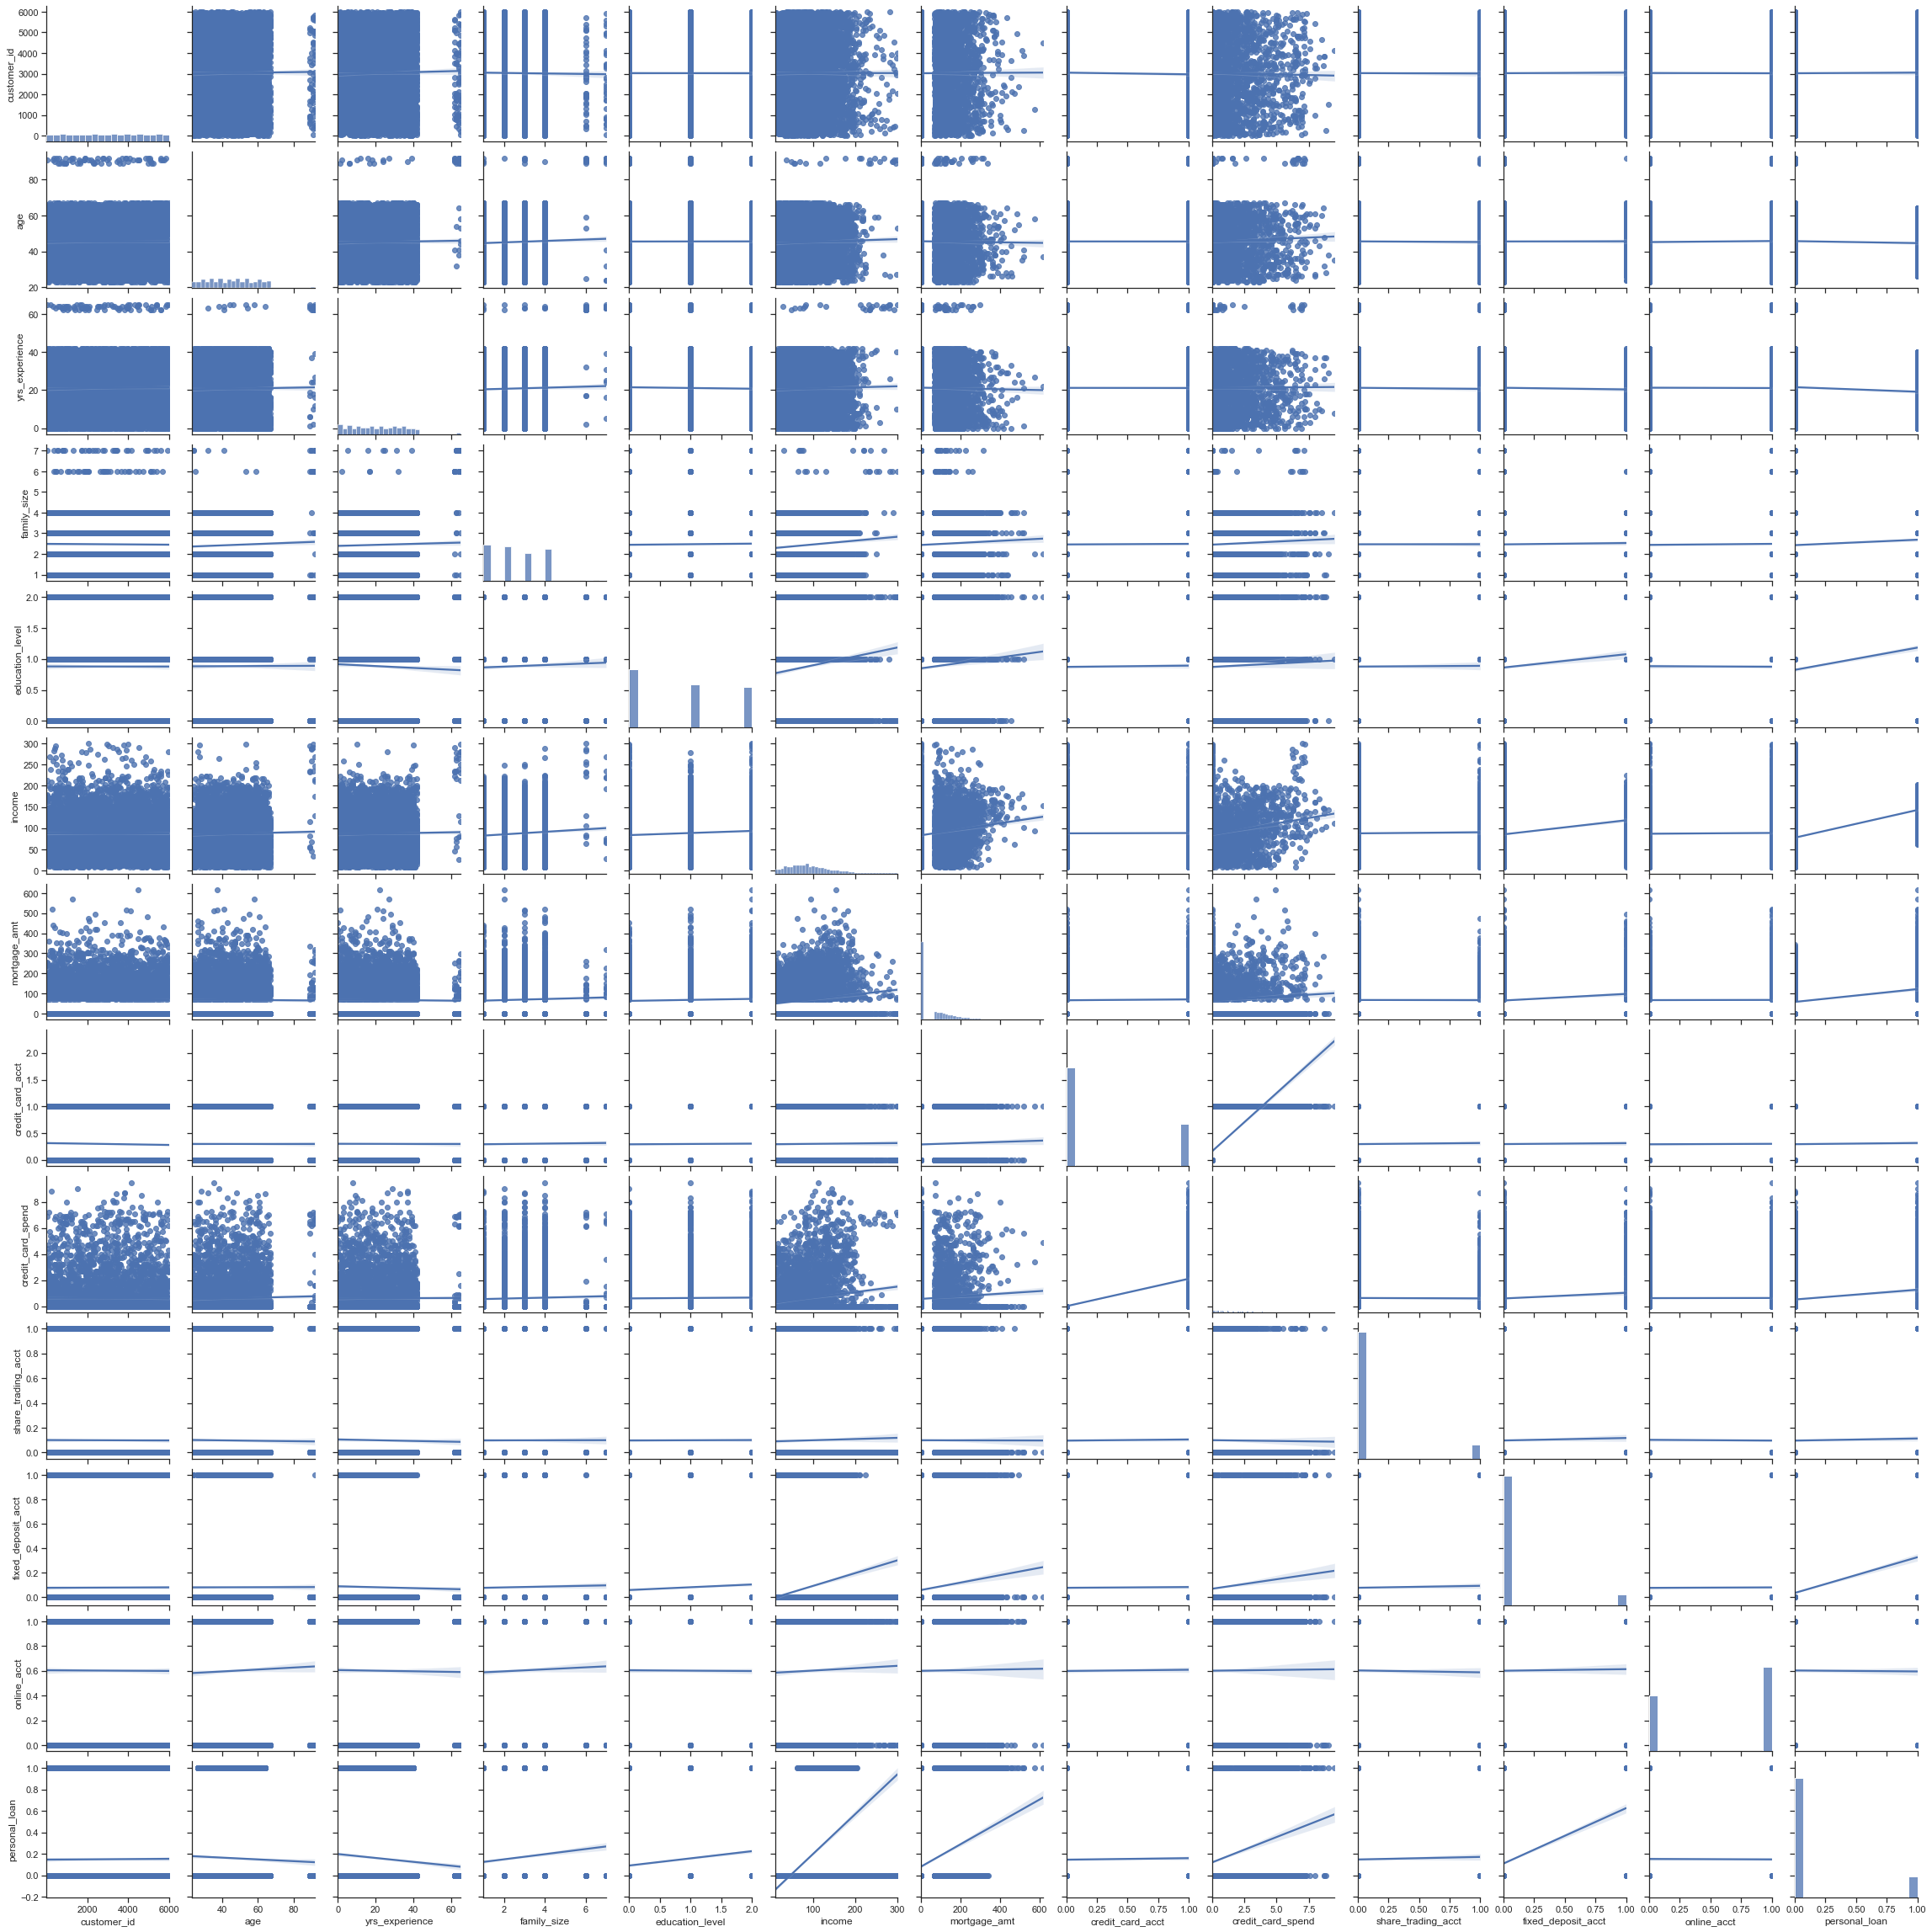

In [212]:
sns.set(style='ticks')
#plt.figure(figsize=(8,16)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.pairplot(loan_df, kind="reg") # kind="reg" means plot the regression line as well

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('correlation-pairplot.png', dpi=300) # dpi=300 is print quality

***Method 3. use Seaborn's heatmap() function***


<AxesSubplot:>

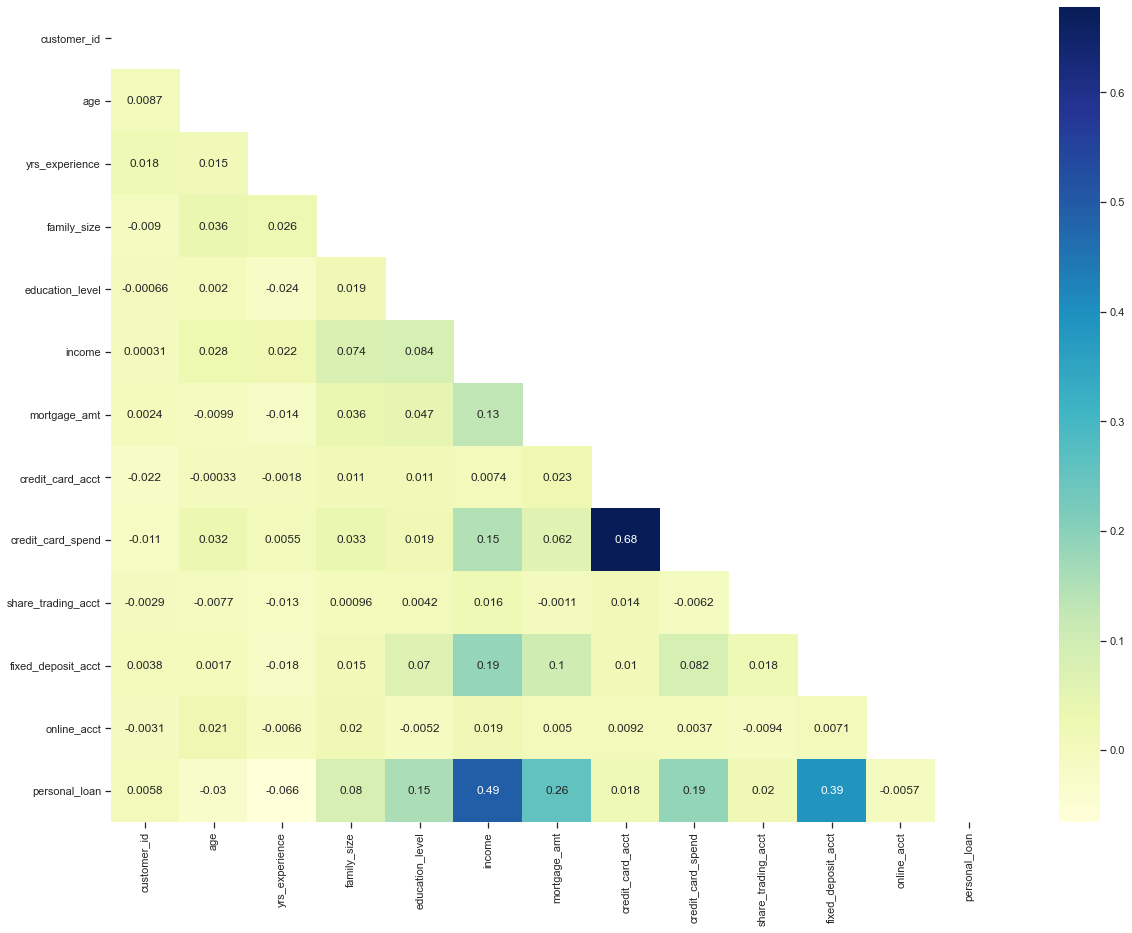

In [217]:
# Triangular shape of the matrix was used to avoid repeated outcome.
matrix = np.triu(loan_df.corr())
sns.heatmap(loan_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('correlation-heatmap-traingular.png', dpi=300) # dpi=300 is print quality

***There is somehow strong relationships in the last column(personal_loan) that are:***
- income 0.49: this is still below 0.7-8 because an income itself does not cause diabetes and the other factors are involved
- fixed_deposit_acct: 0.39
- mortgate_amt: 0.26

***The other columns show how one variable is related to other variables. There are a strong relationship between...***
- credit_card_spend and credit_cart_acct: 0.68

### ***Visualization***

- many of visualization techniques will not work with the null value -> data cleaning must be preceded. 